In [ ]:
# pip install mesh-to-sdf trimesh PyMCubes

In [1]:
import warnings
# warnings.warn("Workaround", FutureWarning)
# warnings.warn("Workaround", DeprecationWarning)
# warnings.filterwarnings("ignore", append=True)
warnings.filterwarnings("ignore", category=DeprecationWarning, append=True)
warnings.filterwarnings("ignore", category=FutureWarning, append=True)

In [2]:
import numpy as np
import mesh_to_sdf
import mcubes
import trimesh

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression

c:\Users\LAPTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\Users\LAPTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release

In [3]:
mesh = trimesh.load_mesh("monkj.obj")
points, dists = mesh_to_sdf.sample_sdf_near_surface(
    mesh, 
    number_of_points=250000
)

points = points/2.0
dists = dists/2.0

print(points.min(), points.max(), points.shape)
print(dists.min(), dists.max(), dists.shape)

-0.49897724 0.49753487 (250000, 3)
-0.20605892 0.3430072 (250000,)


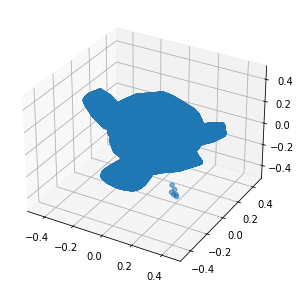

In [4]:
fig =plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim3d(-0.5, 0.5)
ax.set_ylim3d(-0.5, 0.5)
ax.set_zlim3d(-0.5, 0.5)
result = points[dists<0]
ax.scatter(result[:, 0], result[:, 1], result[:, 2]*-1)

In [8]:
obj3d_df = pd.DataFrame()

result = points[dists<0][::3]
obj3d_df['x'] = result[:, 0]
obj3d_df['y'] = result[:, 1]
obj3d_df['z'] = result[:, 2]

fig = px.scatter_3d(
    obj3d_df,
    x='x',
    y='z',
    z='y',
    width=500, 
    height=500,
    opacity=0.3,
    color='y',
)

fig.update_traces(marker_size=1)

In [90]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(3,)))

start = 256
while start != 16:
    model.add(tf.keras.layers.Dense(start, activation='relu'))
    start //= 2
# for i in range(8):
#     model.add(tf.keras.layers.Dense(64, activation='relu'))

#model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1,))

adam = tf.keras.optimizers.Adam(learning_rate=1e-6)
model.compile(
    optimizer=adam, 
    loss='MSE', 
    metrics=['MSE']
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 256)               1024      
_________________________________________________________________
dense_66 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_67 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_68 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 33        
Total params: 44,289
Trainable params: 44,289
Non-trainable params: 0
_________________________________________________________________


In [105]:
history = model.fit(points, dists, batch_size=2048*2, epochs=1200)

Epoch 1/1200
62/62 [==============================] - 0s 5ms/step - loss: 9.1841e-06 - MSE: 9.1841e-06
Epoch 2/1200
62/62 [==============================] - 0s 4ms/step - loss: 9.1801e-06 - MSE: 9.1801e-06
Epoch 3/1200
62/62 [==============================] - 0s 4ms/step - loss: 9.1819e-06 - MSE: 9.1819e-06
Epoch 4/1200
62/62 [==============================] - 0s 4ms/step - loss: 9.1776e-06 - MSE: 9.1776e-06
Epoch 5/1200
62/62 [==============================] - 0s 4ms/step - loss: 9.1748e-06 - MSE: 9.1748e-06
Epoch 6/1200
62/62 [==============================] - 0s 4ms/step - loss: 9.1728e-06 - MSE: 9.1728e-06
Epoch 7/1200
62/62 [==============================] - 0s 4ms/step - loss: 9.1716e-06 - MSE: 9.1716e-06
Epoch 8/1200
62/62 [==============================] - 0s 4ms/step - loss: 9.1676e-06 - MSE: 9.1676e-06
Epoch 9/1200
62/62 [==============================] - 0s 4ms/step - loss: 9.1693e-06 - MSE: 9.1693e-06
Epoch 10/1200
62/62 [==============================] - 0s 4ms/step - loss

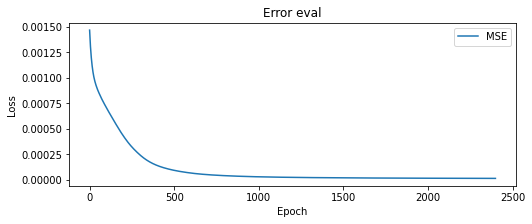

In [92]:
fig, ax = plt.subplots(1, figsize=(8, 3))
ax.plot(history.history["MSE"], label="MSE")
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
ax.legend(loc="upper right")
ax.set_title("Error eval")
plt.show()

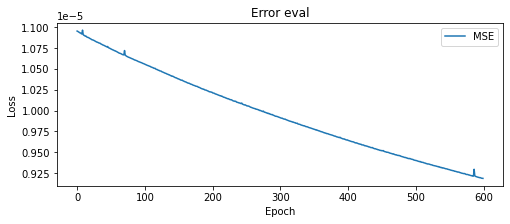

In [100]:
fig, ax = plt.subplots(1, figsize=(8, 3))
ax.plot(history.history["MSE"], label="MSE")
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
ax.legend(loc="upper right")
ax.set_title("Error eval")
plt.show()

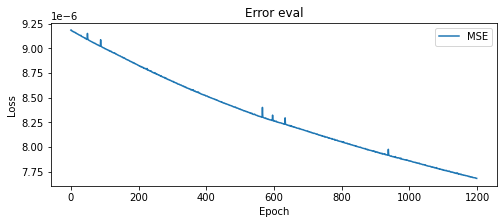

In [106]:
fig, ax = plt.subplots(1, figsize=(8, 3))
ax.plot(history.history["MSE"], label="MSE")
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
ax.legend(loc="upper right")
ax.set_title("Error eval")
plt.show()

In [15]:
RESOLUTION = 512

points_pred = np.array(
    np.mgrid[
        -0.5:0.5:RESOLUTION*1j,
        -0.5:0.5:RESOLUTION*1j,
        -0.5:0.5:RESOLUTION*1j
    ]
).T.reshape(-1,3)

print(points_pred.shape)

(134217728, 3)


In [107]:
# import torch
# torch.cuda.empty_cache()
import gc
gc.collect()

7611

In [108]:
sample_points_pred = points_pred#[::100]

dists_pred = model.predict(sample_points_pred, batch_size=32768*2)
print(dists_pred.min(), dists_pred.max(), dists_pred.shape)

-0.18618114 0.581078 (134217728, 1)


In [109]:
is_inside = dists_pred < 0
points_inside = np.array(sample_points_pred[is_inside.reshape(-1)])
points_inside.shape

(11107638, 3)

(11492588, 3)


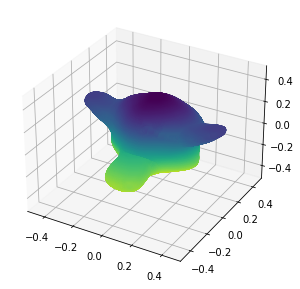

In [39]:
fig =plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim3d(-0.5, 0.5)
ax.set_ylim3d(-0.5, 0.5)
ax.set_zlim3d(-0.5, 0.5)

vis_points = points_inside #[::1000]
print(vis_points.shape)
ax.scatter(
    vis_points[:, 0],
    vis_points[:, 1],
    vis_points[:, 2]*-1,
    c=vis_points[:, 2]
)

In [63]:
# obj3d_df = pd.DataFrame()

# obj3d_df['x'] = vis_points[:, 0]
# obj3d_df['y'] = vis_points[:, 1]
# obj3d_df['z'] = vis_points[:, 2]

# print(vis_points.shape)
# fig = px.scatter_3d(
#     obj3d_df,
#     x='x',
#     y='z',
#     z='y',
#     width=500, 
#     height=500,
#     opacity=0.3,
#     color='x',
# )

# fig.update_traces(marker_size=1)

In [111]:
is_inside = dists_pred < 0
voxels = is_inside.reshape((RESOLUTION,RESOLUTION,RESOLUTION)).T
verts, tris = mcubes.marching_cubes(voxels, 0.5)
# mcubes.export_obj(verts, tris, f'suzanne_mcubes_256_128_64_32_16_1_epoch_800.obj')
# mcubes.export_obj(verts, tris, f'suzanne_mcubes_64x8_epoch_1200.obj')
mcubes.export_obj(verts, tris, f'suzanne_mcubes_256_128_64_32_1_epoch_2400+1800epoch_on_4096_batch.obj')

# smooth_voxels = mcubes.smooth(voxels)
# verts, tris = mcubes.marching_cubes(smooth_voxels, 0)
# mcubes.export_obj(verts, tris, f'suzanne_mcubes_smooth.obj')
